In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

In [2]:
subject_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12', '13']

In [3]:
wli = []
bli = []
for subject_id in subject_list:
    dir_path = f"analyses_results/sub-{subject_id}/mvpa/correlations/"
    wc = pd.read_csv(dir_path+'within_correlations.csv')
    wc['participant_id'] = subject_id
    wli.append(wc)

    bc = pd.read_csv(dir_path+'between_correlations.csv')
    bc['participant_id'] = subject_id
    bli.append(bc)
within_correlations = pd.concat(wli).drop('Unnamed: 0', axis = 1)
between_correlations = pd.concat(bli).drop('Unnamed: 0', axis = 1)

In [4]:
within_correlations_melt = within_correlations.melt(id_vars=['participant_id', 'runs', 'block_type', 'ROIs'], var_name = 'correlations', value_name='corr')

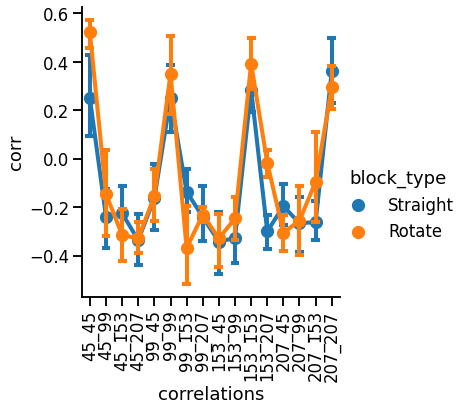

In [7]:
sns.set_context('talk')
ax = sns.catplot(x = 'correlations', y = 'corr', hue = 'block_type',
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02') & (within_correlations_melt.ROIs == 'v1'))])
ax.set_axis_labels().set_xticklabels(rotation = 90)
plt.savefig('plots_for_bb/within_correlations/within_corr_dir_pairs_v1.png', dpi = 600, bbox_inches = 'tight')

In [19]:
away = []
for i in within_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
within_correlations_melt['targets_away'] = away

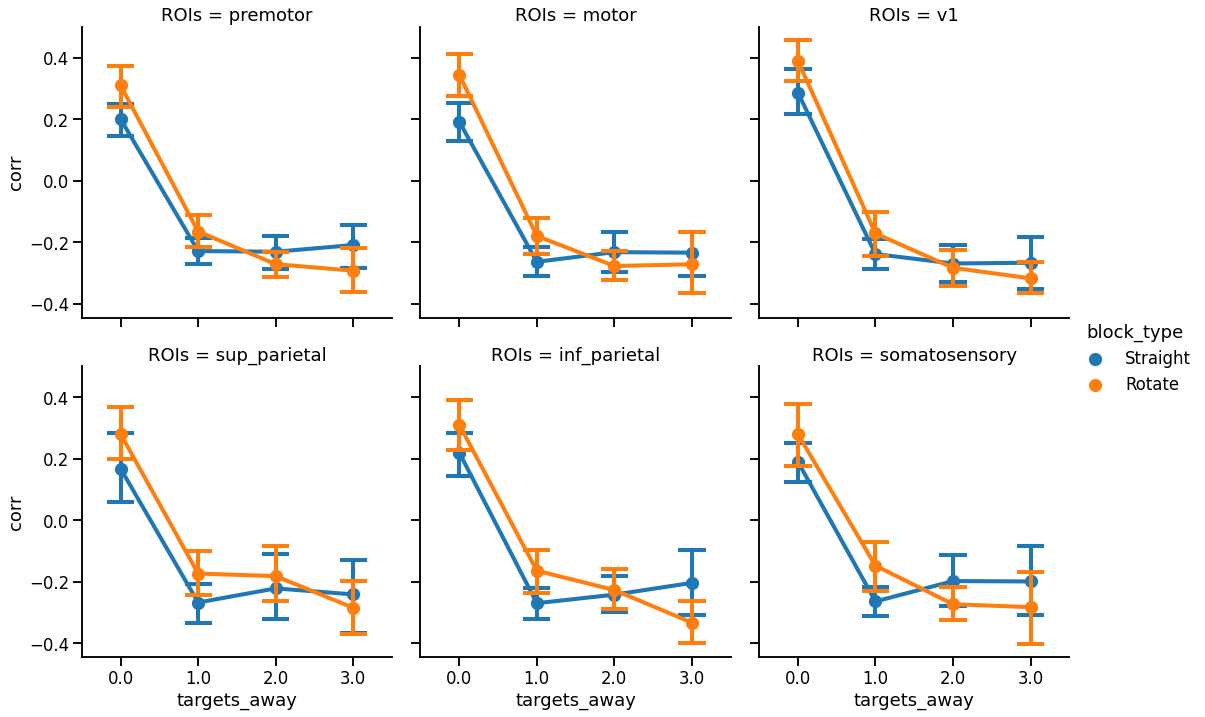

In [63]:
sns.set_context('talk')
sns.catplot(x = 'targets_away', y = 'corr', hue = 'block_type',col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02'))])
plt.savefig('plots_for_bb/within_correlations/within_corr_targ_away_all.png', dpi = 600)

# Between Blocks

In [8]:
between_correlations_melt = between_correlations.melt(id_vars=['participant_id', 'run_pairs', 'ROIs'], var_name = 'correlations', value_name='corr')

In [26]:
away = []
for i in between_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
between_correlations_melt['targets_away'] = away

In [17]:
aim = []
for i in between_correlations_melt.correlations.str.split('_').values:
    aim.append((int(i[0]) - (int(i[1]) - 90)))
between_correlations_melt['aim_diff'] = aim

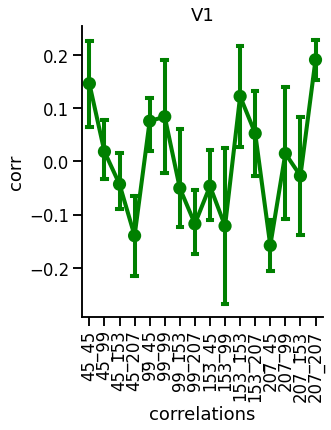

In [23]:

ax = sns.catplot(x = 'correlations', y = 'corr',   color = 'g',
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt.loc[((between_correlations_melt.ROIs == 'v1') & (between_correlations_melt.participant_id == '02'))])
ax.set_axis_labels().set_xticklabels(rotation = 90)
plt.title('V1')
plt.savefig('plots_for_bb/bw_correlations/mean_centered/bw_corr_all_pairs_v1.png', dpi = 600, bbox_inches = 'tight')

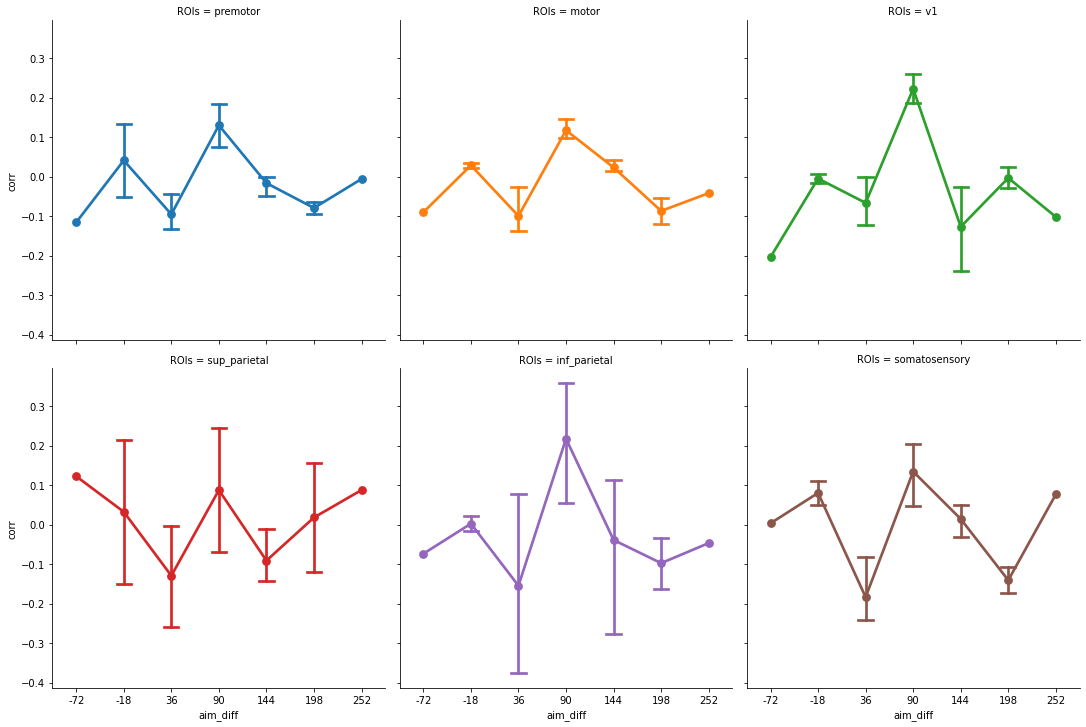

In [55]:
sns.catplot(x = 'aim_diff', y = 'corr', hue = 'ROIs', col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt.loc[((between_correlations_melt.participant_id == '02') & (between_correlations_melt.run_pairs == 2))])
#plt.savefig('plots_for_bb/aim_diff_all_participants_first_pair.png', dpi = 600)

In [4]:
kl_div_svm = pd.read_csv('kl_divergence_svm.csv').drop('Unnamed: 0', axis = 1)

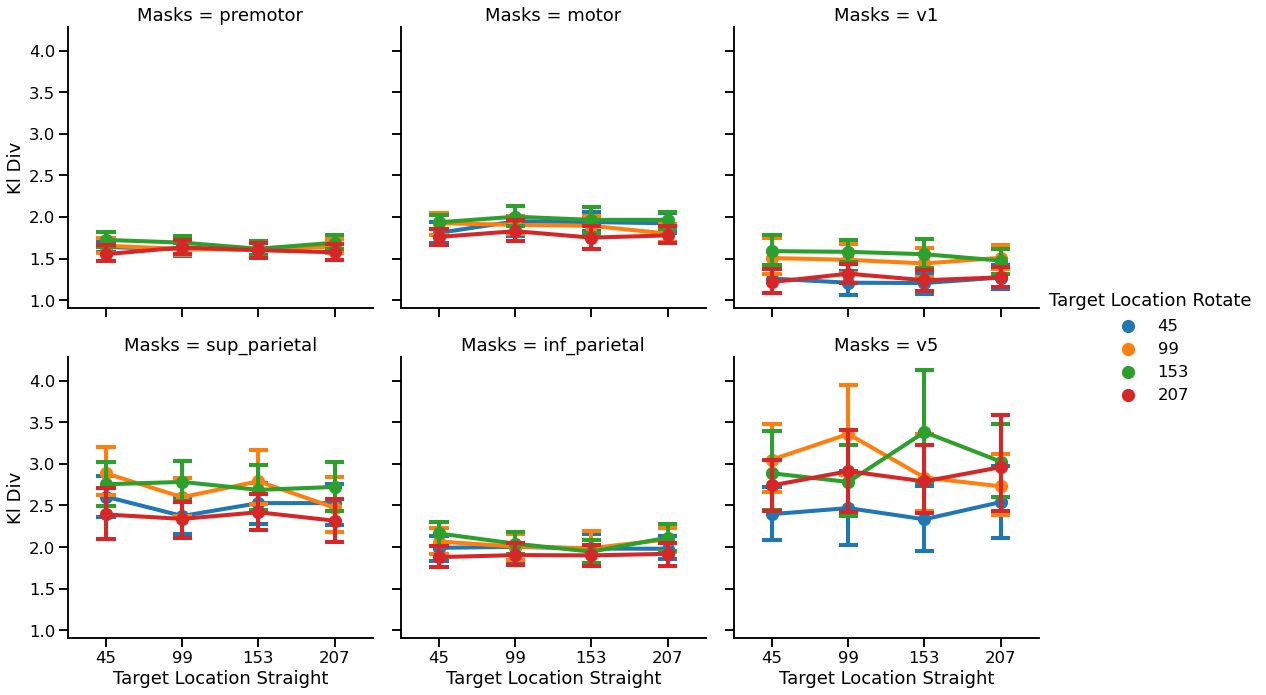

In [7]:
sns.set_context('talk')
sns.catplot(x = 'Target Location Straight', y = 'Kl Div', hue = 'Target Location Rotate', col = 'Masks',
            data = kl_div_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )

In [39]:
weight_weight_init = pd.read_csv('rot_weight_str_data_corr_svm_early_tt_mean.csv').drop('Unnamed: 0', axis = 1)
weight_weight_late = pd.read_csv('rot_weight_str_data_corr_svm_late_tt_mean.csv').drop('Unnamed: 0', axis = 1)

len(weight_weight_init)

2304

In [40]:
weight_weight = pd.concat([weight_weight_init, weight_weight_late]).reset_index().drop('index', axis =1)
weight_weight['phase'] = np.repeat(['Early', 'Late'], len(weight_weight_init))

In [41]:
weight_weight['aim direction'] = weight_weight['Target Location Rotate'] - 90
weight_weight['aim difference'] = weight_weight['aim direction'] - weight_weight['Target Location Straight']


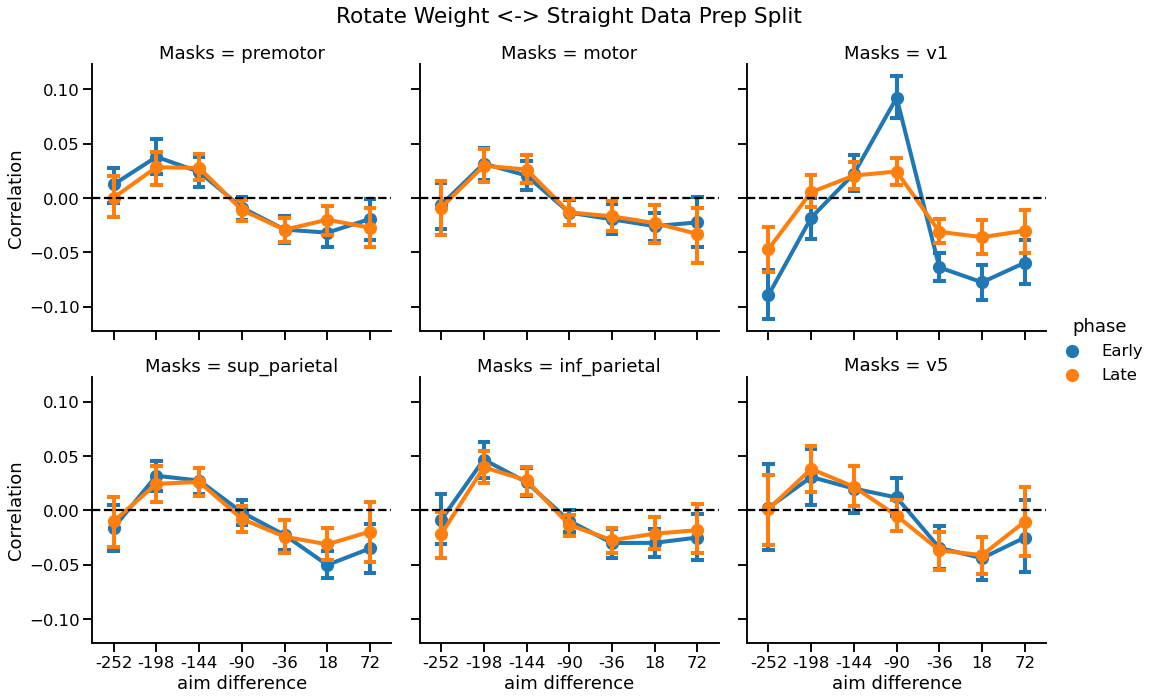

In [42]:
sns.set_context('talk')
g = sns.catplot(x = 'aim difference', y = 'Correlation',  col = 'Masks', hue = 'phase',
            data = weight_weight,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
    
g.fig.suptitle('Rotate Weight <-> Straight Data Prep Split')
g.fig.subplots_adjust(top=.9)


In [7]:
weight_weight_corr_svm = pd.read_csv('rot_early_str_early_weight_weight_corr_svm_prep_tt_mean.csv').drop('Unnamed: 0', axis = 1)

In [8]:
weight_weight_corr_svm['target location difference'] = weight_weight_corr_svm['Straight Direction'] - weight_weight_corr_svm['Rotate Direction']

In [9]:
weight_weight_corr_svm

,Participants,Masks,Rotate Direction,Straight Direction,Correlation,target location difference
0,1,premotor,153,153,-0.012954,0
1,1,premotor,153,207,-0.011897,54
2,1,premotor,153,45,0.005265,-108
3,1,premotor,153,99,0.029341,-54
4,1,premotor,207,153,0.016050,-54
...,...,...,...,...,...,...
2299,26,v5,45,99,0.032171,54
2300,26,v5,99,153,-0.025153,54
2301,26,v5,99,207,0.075348,108
2302,26,v5,99,45,-0.022851,-54


In [10]:
weight_weight_corr_svm['aim direction'] = weight_weight_corr_svm['Rotate Direction'] - 90
weight_weight_corr_svm['aim difference'] = weight_weight_corr_svm['aim direction'] - weight_weight_corr_svm['Straight Direction']


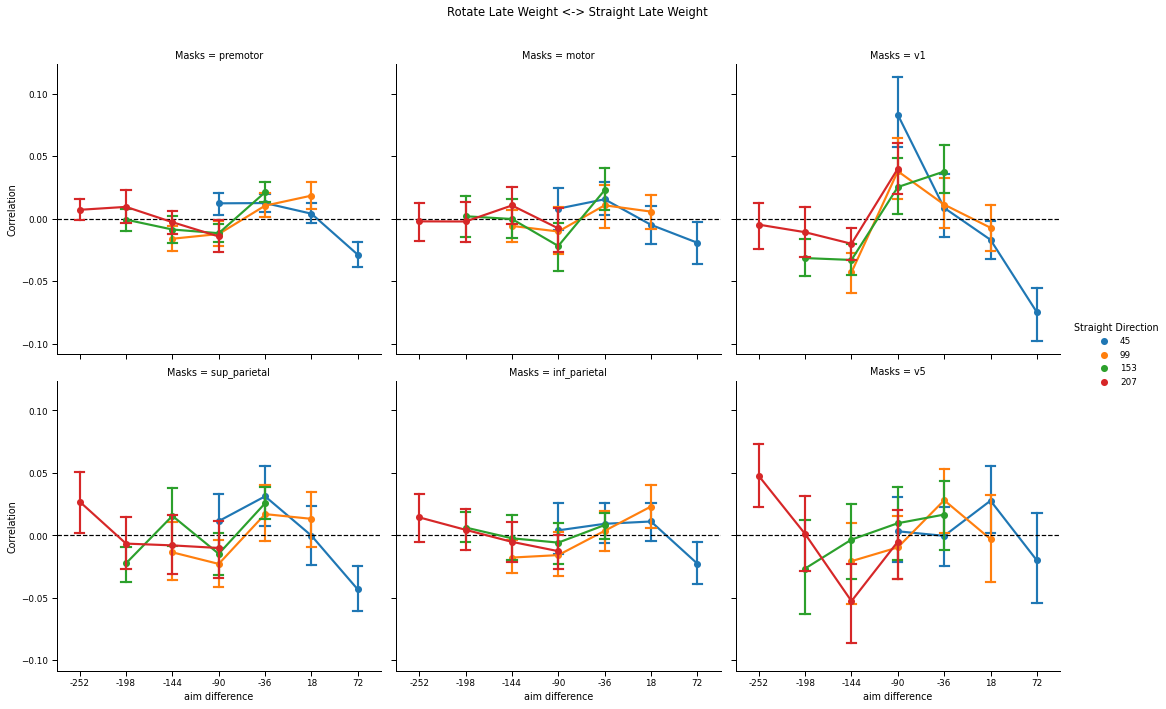

In [52]:
sns.set_context('paper')
g = sns.catplot(x = 'aim difference', y = 'Correlation', col = 'Masks', hue = 'Straight Direction',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2, col_wrap = 3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Rotate Late Weight <-> Straight Late Weight')
g.fig.subplots_adjust(top=.9)


AttributeError: 'numpy.ndarray' object has no attribute 'axhline'

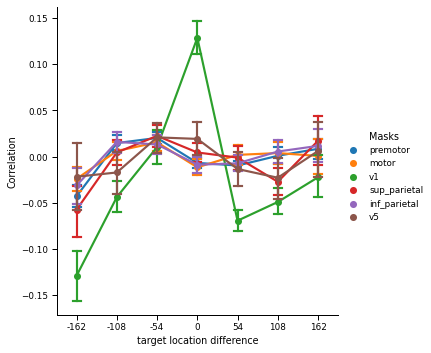

In [11]:
sns.set_context('paper')
g = sns.catplot(x = 'target location difference', y = 'Correlation', hue = 'Masks',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2,           
           )
for col in range(1):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Rotate Weight <-> Straight Data (Whole Prep)')
g.fig.subplots_adjust(top=.9)


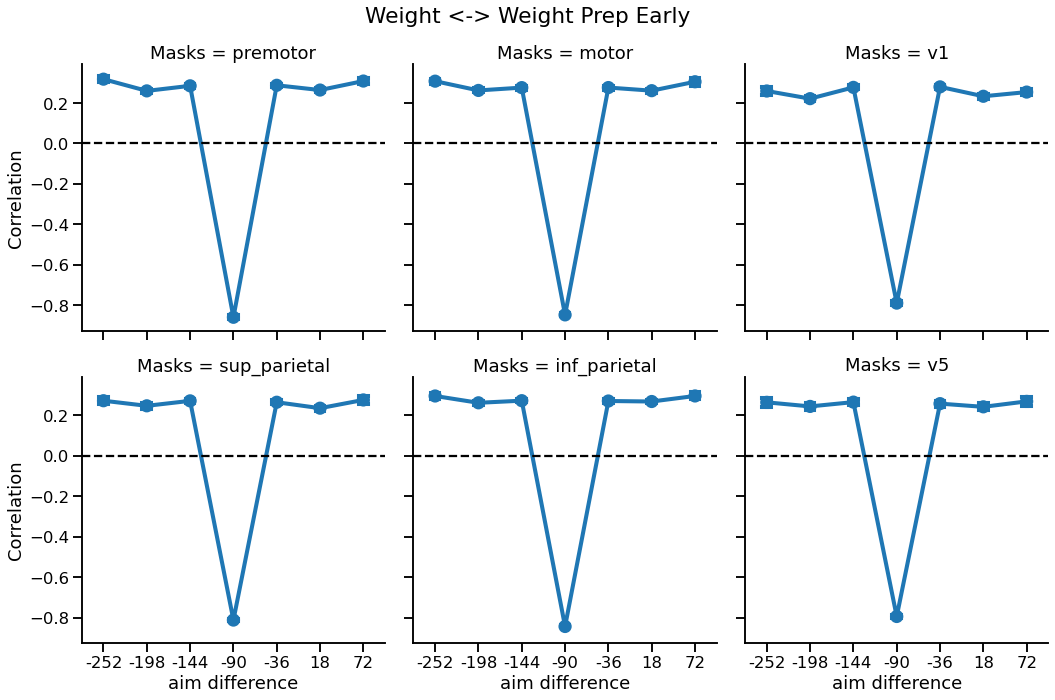

In [39]:
weight_weight_corr_svm = pd.read_csv('early_late_str_weight_weight_corr_svm_prep_tt_mean.csv').drop('Unnamed: 0', axis = 1)
weight_weight_corr_svm['aim direction'] = weight_weight_corr_svm['Target Location Rotate'] - 90
weight_weight_corr_svm['aim difference'] = weight_weight_corr_svm['aim direction'] - weight_weight_corr_svm['Target Location Straight']
sns.set_context('talk')
g = sns.catplot(x = 'aim difference', y = 'Correlation',  col = 'Masks',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Weight <-> Weight Prep Early')
g.fig.subplots_adjust(top=.9)


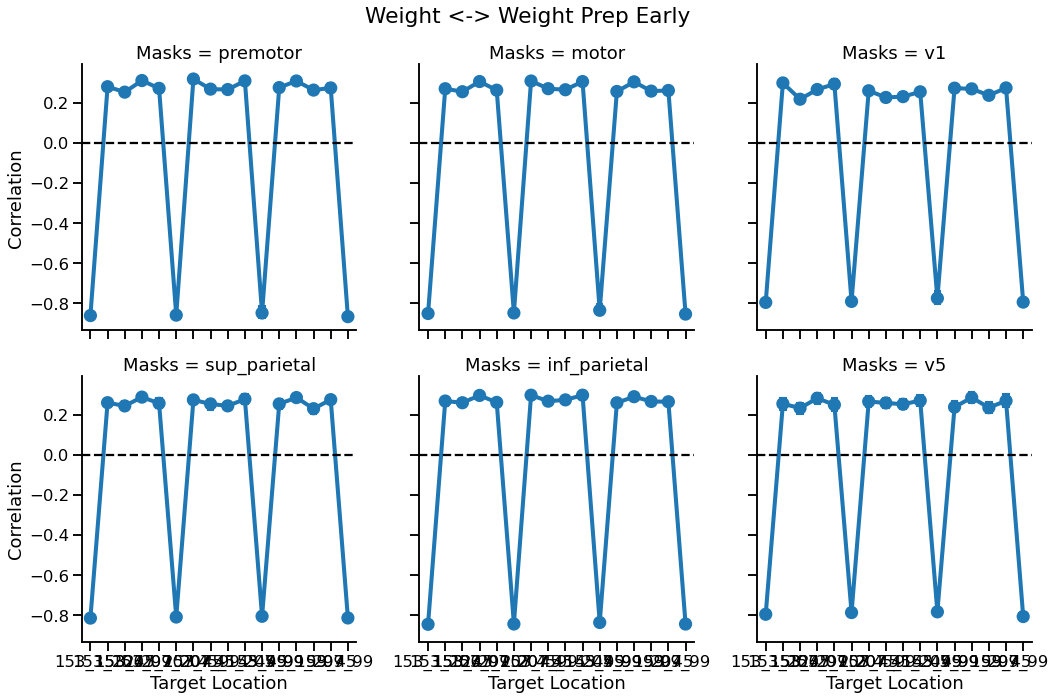

In [36]:
weight_weight_corr_svm = pd.read_csv('early_late_str_weight_weight_corr_svm_prep_tt_mean.csv').drop('Unnamed: 0', axis = 1)
weight_weight_corr_svm['Target Location Straight'] = weight_weight_corr_svm['Target Location Straight'].values.astype(str)
weight_weight_corr_svm['Target Location Rotate'] = weight_weight_corr_svm['Target Location Rotate'].values.astype(str)
weight_weight_corr_svm['Target Location'] = weight_weight_corr_svm['Target Location Straight'] + '_' + weight_weight_corr_svm['Target Location Rotate']
g = sns.catplot(x = 'Target Location', y = 'Correlation',  col = 'Masks',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Weight <-> Weight Prep Early')
g.fig.subplots_adjust(top=.9)


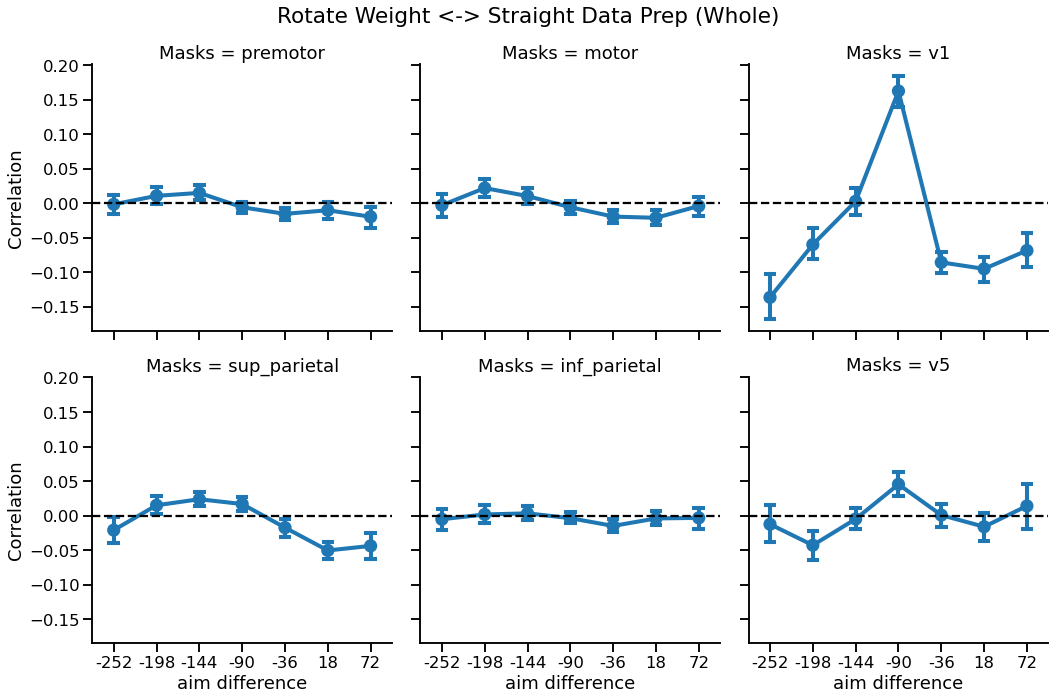

In [14]:
weight_weight_corr_svm = pd.read_csv('rot_weight_str_data_corr_svm_prep_cv_mean.csv').drop('Unnamed: 0', axis = 1)
weight_weight_corr_svm['aim direction'] = weight_weight_corr_svm['Target Location Rotate'] - 90
weight_weight_corr_svm['aim difference'] = weight_weight_corr_svm['aim direction'] - weight_weight_corr_svm['Target Location Straight']
sns.set_context('talk')
g = sns.catplot(x = 'aim difference', y = 'Correlation',  col = 'Masks',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Rotate Weight <-> Straight Data Prep (Whole)')
g.fig.subplots_adjust(top=.9)


In [20]:
classifier_accuracies = pd.read_csv('prep_accuracies_tt.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)

In [26]:
classifier_accuracies_melt = classifier_accuracies.melt(id_vars=['Participants', 'Masks'],  var_name=['Data'], value_name='Accuracies')

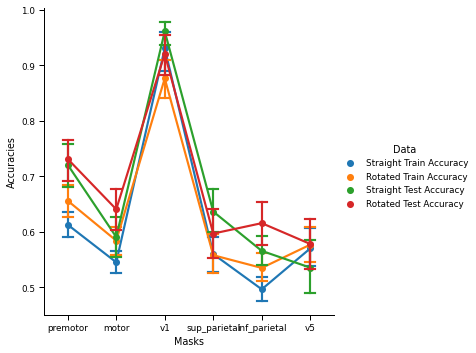

In [31]:
sns.set_context('paper')
g = sns.catplot(x = 'Masks', y = 'Accuracies', hue = 'Data',
            data = classifier_accuracies_melt,
            kind = 'point', capsize = 0.2           
           )
# g.set_xticklabels(rotation = 90)